In [279]:
# import numpy as np
# from fw import *

# # maximal clique problem
# # target function is xT*A*x + some regularization term
# # with x being an n-dimensional simplex
# # (feasible set consists of probability simplexes)
# # and A - a {0,1} graph adjacency matrix

# def maxclique_target(A: np.ndarray, x:np.ndarray, p: int=0.5):
#     '''
#     Target function for the Maximal Clique Problem.
#     '''
#     return np.matmul(x.T,np.matmul(A,x)) + p*np.linalg.norm(x)**2

# def maxclique_grad(A: np.ndarray, x: np.ndarray, penalty: str = 'l2', p: int = 0.5, alpha: float = None, beta: float = None, eps: float = None):
#     """
#     Gradient calculation for the Maximal Clique Problem.

#     A: a R^NxN adjacency matrix;
#     x: a R^N vector;
#     penalty: {'l2', 'f1', 'f2'} string specifying the type of penalty to use; defaults to l2;
#     p, alpha, beta, eps: penalty parameters.
#     """
#     dp = 2*x*p
#     if str.lower(penalty) == 'f1':
#         raise NotImplementedError
#     if str.lower(penalty) == 'f2':
#         if beta <= 0 or alpha < 0 or alpha >= (2/beta**2):
#             raise ValueError
#         dp = alpha*np.sum(-beta*np.exp(-beta*x))

#     return np.dot((A + A.T), x) + dp

# def maxclique_lmo(grad):
#     """
#     LMO for the maximal clique problem. 
#     The feasible set is the unit simplex, so return a [0,...,1,...,0] vector with 1 in place of the lowest element of the gradient.
#     """
#     e = np.zeros(shape=grad.shape[-1])
#     idxmin = np.argmin(grad)
#     e[idxmin] = 1
#     return e

# def frankwolfe(A: np.ndarray, x_0: float, grad=maxclique_grad, lmo=maxclique_lmo, max_iter: int = 10000, stepsize: float = None):
#     '''
#     Basic Frank-Wolfe algorithm.

#     A: graph adjacency matrix;
#     x_0: starting point;
#     grad: gradient f-n;
#     lmo: linear oracle;
#     max_iter: max. nr of iterations;
#     stepsize: defaults to 2/(k+2), step defined as (1-stepsize)*x_k + stepsize*x_k_hat.
#     '''
#     x_hist = [x_0]
#     s_hist = []
#     for k in range(max_iter):
#         #g = approx_fprime(x_hist[-1], lambda x: maxclique_target(A, x))
#         g = grad(x=x_hist[-1])
#         s = lmo(g)
#         gamma = 2/(k+2) if stepsize is None else stepsize
#         x_next = (1-gamma)*x_hist[-1] + gamma*s

#         x_hist.append(x_next)
#         s_hist.append(s)
#     return x_hist, s_hist

In [280]:
import numpy as np
from fw import *

def make_test_graph(n, p):
    r = [0,1]
    A = np.tril(np.random.default_rng().choice(a=r, size=(n,n),p=[1-p, p]), k=-1)
    A = A + A.T
    return A

def draw_graph(A):
    import networkx as nx
    A_ = np.copy(A)
    G = nx.Graph(A_)
    nx.draw(G, labels={i:f'{i}' for i in range(A.shape[0])})

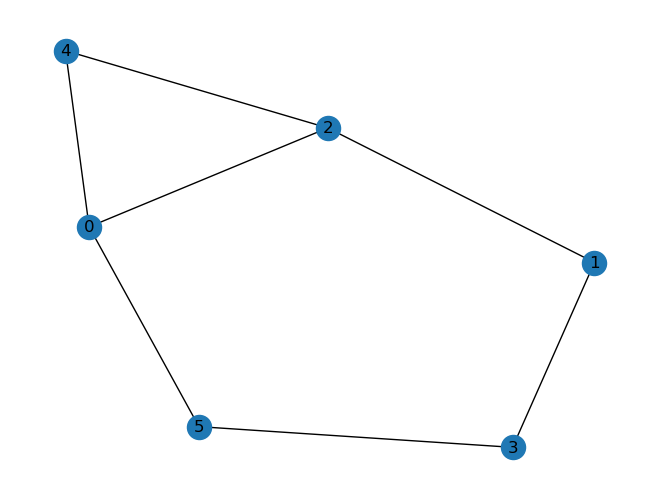

In [281]:
n = 6
A = make_test_graph(n, 0.5)
draw_graph(A)

In [282]:
x_0 = np.random.uniform(low=0.0, high=1.0, size=n)
x_0 /= np.sum(x_0)

x_hist, s_hist = frankwolfe(grad=lambda x: -maxclique_grad(A, x), lmo=maxclique_lmo, max_iter=10000, x_0=x_0)

In [283]:
x = x_hist[-1]
1./(1.-np.dot(np.dot(x.T,A),x))

2.999999920008019

In [284]:
x_hist[-1]

array([0.33326667, 0.        , 0.3334    , 0.        , 0.33333333,
       0.        ])

In [228]:
from scipy.optimize import approx_fprime
def grad_wrapper(A, x):
    return -approx_fprime(x, lambda z: maxclique_target(A, z))

In [239]:
from scipy.optimize import minimize, rosen, rosen_der
bnds = [(0, None) for i_ in range(n)]
cons = ({'type': 'eq', 'fun': lambda x: x.sum()-1})
res = []
n_tries = 100
p=0.5
for i in range(n_tries):
    x_0 = np.random.uniform(low=0.0, high=1.0, size=n)
    x_0 /= np.sum(x_0)
    m = minimize(
        lambda x: -maxclique_target(A, x,p=p), x_0, 
        jac=lambda x: -maxclique_grad(A, x,p=p),
        #jac = '3-point',
        method='SLSQP', bounds=bnds, constraints=cons
        )
    res.append(m.x)

In [240]:
x_s = np.mean(res,axis=0)
x_s

array([0.21499124, 0.04      , 0.30663967, 0.30671409, 0.131655  ])

In [241]:
1./(1.-np.dot(np.dot(x_s.T,A),x_s))

2.786032663099746